<a href="https://colab.research.google.com/github/TruongQuocHau110802/AI-subject/blob/main/AI_hoi_qui_27_09_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 11.4 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=92c5d7bbb2c9b3dda25e2cc6f6b0361e61f359f15d010a508f4626e8bfb109ec
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


4.67000000000001


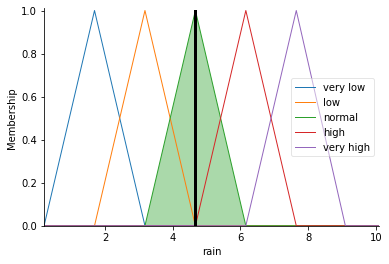

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
temp = ctrl.Antecedent(np.arange(20.4,42.2,0.01),'temp')
wind = ctrl.Antecedent(np.arange(0.7,4.1,0.01),'wind')
rain = ctrl.Consequent(np.arange(0.2,10.1,0.01),'rain')
temp['very low'] = fuzz.trimf(temp.universe,[20.4,20.4,25.6])
temp['low'] = fuzz.trimf(temp.universe,[20.4,25.6,30.8])
temp['normal'] = fuzz.trimf(temp.universe,[25.6,30.8,36])
temp['high'] = fuzz.trimf(temp.universe,[30.8,36,41.2])
temp['very high'] = fuzz.trimf(temp.universe,[36,41.2,41.2])

wind['very low'] = fuzz.trimf(wind.universe,[0.7,0.7,1.3])
wind['low'] = fuzz.trimf(wind.universe,[0.7,1.3,1.9])
wind['normal'] = fuzz.trimf(wind.universe,[1.3,1.9,2.5])
wind['high'] = fuzz.trimf(wind.universe,[1.9,2.5,3.1])
wind['very high'] = fuzz.trimf(wind.universe,[2.5,3.1,3.1])

rain['very low'] = fuzz.trimf(rain.universe,[0.2,1.69,3.18])
rain['low'] = fuzz.trimf(rain.universe,[1.69,3.18,4.67])
rain['normal'] = fuzz.trimf(rain.universe,[3.18,4.67,6.16])
rain['high'] = fuzz.trimf(rain.universe,[4.67,6.16,7.65])
rain['very high'] = fuzz.trimf(rain.universe,[6.16,7.65,9.1])
#temp.view()
#wind.view()
#rain.view()

rule1 = ctrl.Rule(temp['very low']&wind['very low'],rain['very low'])
rule2 = ctrl.Rule(temp['very low']&wind['low'],rain['very low'])
rule3 = ctrl.Rule(temp['very low']&wind['normal'],rain['very low'])
rule4 = ctrl.Rule(temp['very low']&wind['high'],rain['low'])
rule5 = ctrl.Rule(temp['very low']&wind['very high'],rain['normal'])
rule6 = ctrl.Rule(temp['low']&wind['very low'],rain['very low'])
rule7 = ctrl.Rule(temp['low']&wind['low'],rain['very low'])
rule8 = ctrl.Rule(temp['low']&wind['normal'],rain['low'])
rule9 = ctrl.Rule(temp['low']&wind['high'],rain['normal'])
rule10 = ctrl.Rule(temp['low']&wind['very high'],rain['normal'])
rule11 = ctrl.Rule(temp['normal']&wind['very low'],rain['low'])
rule12 = ctrl.Rule(temp['normal']&wind['low'],rain['low'])
rule13 = ctrl.Rule(temp['normal']&wind['normal'],rain['normal'])
rule14 = ctrl.Rule(temp['normal']&wind['high'],rain['high'])
rule15 = ctrl.Rule(temp['normal']&wind['very high'],rain['high'])
rule16 = ctrl.Rule(temp['high']&wind['very low'],rain['normal'])
rule17 = ctrl.Rule(temp['high']&wind['low'],rain['low'])
rule18 = ctrl.Rule(temp['high']&wind['normal'],rain['high'])
rule19 = ctrl.Rule(temp['high']&wind['high'],rain['high'])
rule20 = ctrl.Rule(temp['high']&wind['very high'],rain['very high'])
rule21 = ctrl.Rule(temp['very high']&wind['very low'],rain['normal'])
rule22 = ctrl.Rule(temp['very high']&wind['low'],rain['normal'])
rule23 = ctrl.Rule(temp['very high']&wind['normal'],rain['high'])
rule24 = ctrl.Rule(temp['very high']&wind['high'],rain['very high'])
rule25 = ctrl.Rule(temp['very high']&wind['very high'],rain['very high'])

raining_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,
                                    rule8,rule9,rule10,rule11,rule12,rule13,rule14,
                                    rule15,rule16,rule17,rule18,rule19,rule20,rule21,
                                    rule22,rule23,rule24,rule25])
raining = ctrl.ControlSystemSimulation(raining_ctrl)
raining.input['wind'] = 1.9
raining.input['temp'] = 30.8
raining.compute()
print(raining.output['rain'])
rain.view(sim = raining)


In [ ]:
height = ctrl.Antecedent(np.arange(1.5,1.8,0.1),'height')
weight = ctrl.Antecedent(np.arange(40,80,0.1),'weight')
BMI = ctrl.Consequent(np.arange(0,28,0.1),'BMI')
height['very low'] = fuzz.trimf(height.universe,[20.4,20.4,25.6])
height['low'] = fuzz.trimf(height.universe,[20.4,25.6,30.8])
height['normal'] = fuzz.trimf(height.universe,[25.6,30.8,36])
height['high'] = fuzz.trimf(height.universe,[30.8,36,41.2])
height['very high'] = fuzz.trimf(height.universe,[36,41.2,41.2])

weight['very low'] = fuzz.trimf(weight.universe,[0.7,0.7,1.3])
weight['low'] = fuzz.trimf(weight.universe,[0.7,1.3,1.9])
weight['normal'] = fuzz.trimf(weight.universe,[1.3,1.9,2.5])
weight['high'] = fuzz.trimf(weight.universe,[1.9,2.5,3.1])
weight['very high'] = fuzz.trimf(weight.universe,[2.5,3.1,3.1])

BMI['skinny'] = fuzz.trimf(BMI.universe,[0.2,1.69,3.18])
BMI['thin'] = fuzz.trimf(BMI.universe,[1.69,3.18,4.67])
BMI['normal'] = fuzz.trimf(BMI.universe,[3.18,4.67,6.16])
BMI['overweight'] = fuzz.trimf(BMI.universe,[4.67,6.16,7.65])
BMI['obesity'] = fuzz.trimf(BMI.universe,[6.16,7.65,9.1])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = 'Salary_Data.csv'
data = pd.read_csv(url)
#data.head()
#data.shape
x = data.drop(['Salary'],axis = True)
y = data['Salary']
x

FileNotFoundError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
sns.pairplot(data)

In [ ]:
plt.plot(x_train, y_train, 'r.', label = 'Train Data')
plt.xlabel('Year Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test).round(1)
cal = pd.DataFrame(np.c_[y_test,y_pred],columns = ['Original Salary','Predicted Salary'])
cal
print('Coeffient',model.coef_)
print('Intercept',model.intercept_)
print('Accuracy',model.score(x_train,y_train))

Coeffient [9423.81532303]
Intercept 25321.583011776813
Accuracy 0.9024461774180497


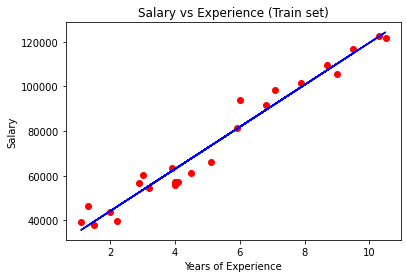

In [ ]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, model.predict(x_train),color = 'blue')
plt.title('Salary vs Experience (Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()